In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from BCell_strategy import gateBCellDataSet
from BCell_strategy_no_fileplt_QC import gateBCellDataSet
import aligater as ag

AliGater started in Jupyter mode


In [3]:
with open('/media/ludvig/Project_Storage/BloodVariome/data/duplicates_and_other_filters/Phase_I/Phase_I_B-Cell_compensation_exceptions.csv') as f:
        compensation_exceptions = [tuple(i.rstrip().split('\t')) for i in f]

In [4]:
BCell_exp=ag.AGExperiment("/media/ludvig/Project_Storage/BloodVariome/data/Phase_I/FCS/10-11-2015/", filters=["B cells", "B_"], compList=compensation_exceptions, markers=["IgA", "CD27" ,"CD34" ,"CD19", "IgD" ,"CD45","CD38","CD24"], QC=False)

2 filter(s) defined
Collected 32 files, 63 files did not pass filter(s) and mask(s).


In [5]:
#Read in exclusions from file
exclusion_DF = ag.pd.read_csv('/media/ludvig/Project_Storage/BloodVariome/data/duplicates_and_other_filters/Phase_I/Phase_I_B-cell_exclusions.txt',sep='\t')
exclusions = exclusion_DF['sample'].tolist()
#Read in index file (samples to include)
index_samples=ag.pd.read_csv('/media/ludvig/Project_Storage/BloodVariome/data/Phase_I/no_missing_unstained_local_Phase1_index.txt',sep='\t')['local_path']
#Filter out the populations you want and remove files in the exclusion list
lFlaggedIndicies=ag.applyFilter(index_samples,lFilter=["B cells", "Bcells","B_"],lMask=exclusions,lIgnoreTypes=None)
filtered_index_samples = [i for j, i in enumerate(index_samples) if j not in lFlaggedIndicies]
#Check how many samples there are
reportStr="After using index file and filtering, "+str(len(filtered_index_samples))+" samples remain\n"
ag.sys.stderr.write(reportStr)
BCell_exp.fcsList=filtered_index_samples[0:1]

After using index file and filtering, 2829 samples remain


Sample (/media/ludvig/Project_Storage/BloodVariome/data/Phase_I/FCS/09-11-2015/Plate 1/B cells_A2_A02_013_9601500.fcs) is in compensation exception list, collecting external compensation matrix
Opening file B cells_A2_A02_9601512 from folder /10-11-2015/Plate 1
Loaded dataset with 500000 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 
Succesfully collected external compensation matrix
Opening file B cells_A2_A02_013_9601500 from folder /09-11-2015/Plate 1
Loaded dataset with 279180 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 
External compensation matrix passed, applying
Successfully applied manual compensation
Applying strategy


<Figure size 432x288 with 0 Axes>

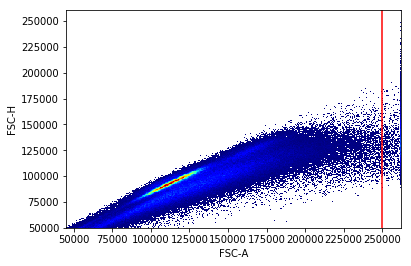

<Figure size 432x288 with 0 Axes>

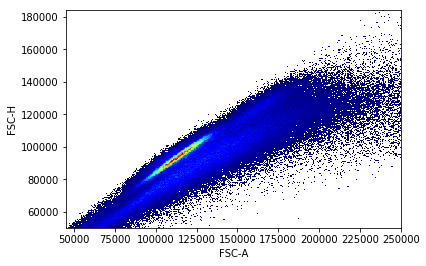

<Figure size 432x288 with 0 Axes>

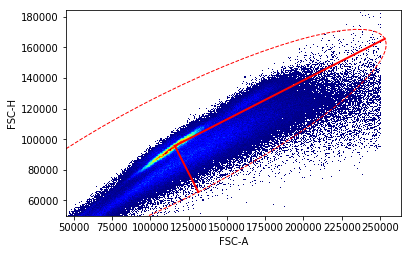

<Figure size 432x288 with 0 Axes>

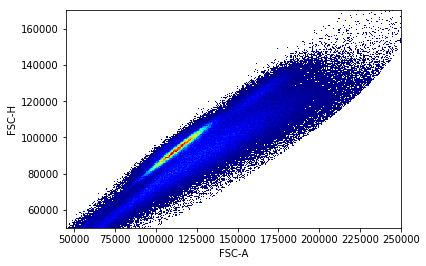

<Figure size 432x288 with 0 Axes>

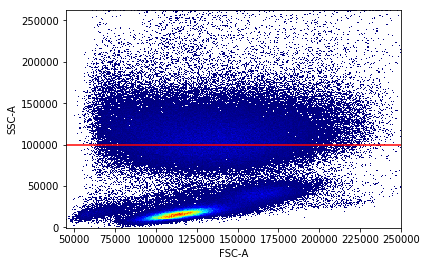

<Figure size 432x288 with 0 Axes>

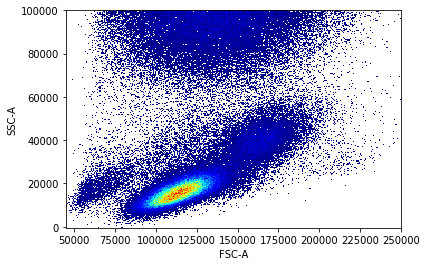

<Figure size 432x288 with 0 Axes>

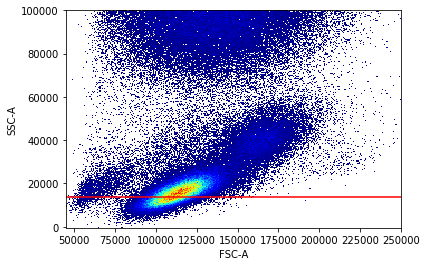

<Figure size 432x288 with 0 Axes>

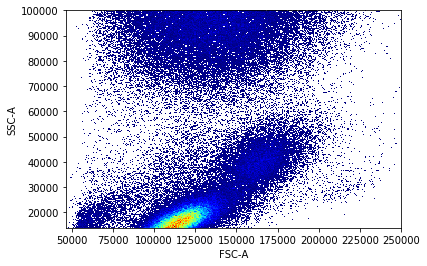

<Figure size 432x288 with 0 Axes>

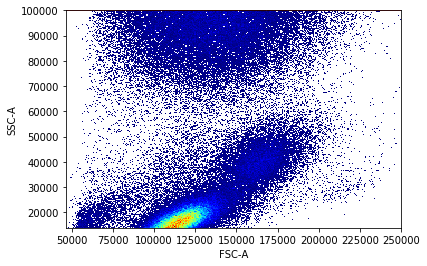

<Figure size 432x288 with 0 Axes>

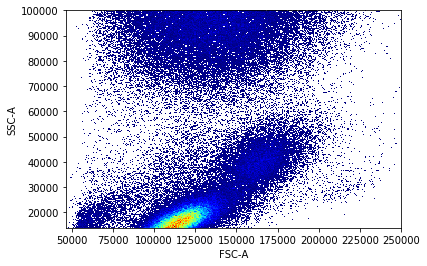

<Figure size 432x288 with 0 Axes>

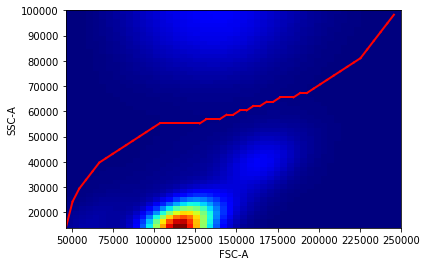

<Figure size 432x288 with 0 Axes>

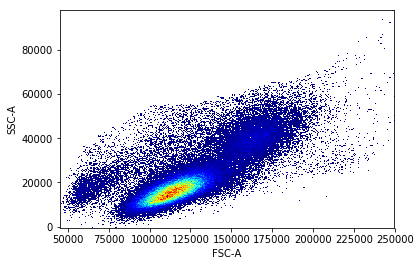

<Figure size 432x288 with 0 Axes>

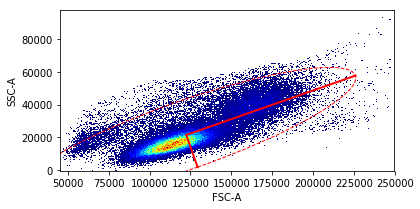

<Figure size 432x288 with 0 Axes>

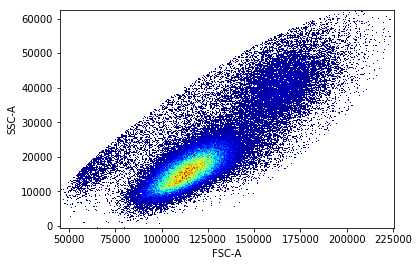

<Figure size 432x288 with 0 Axes>

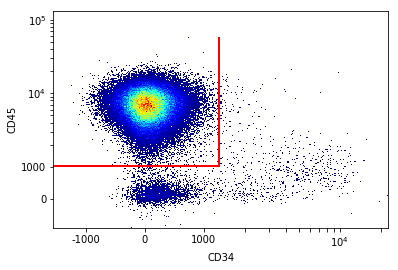

<Figure size 432x288 with 0 Axes>

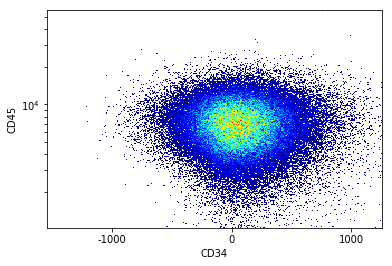

<Figure size 432x288 with 0 Axes>

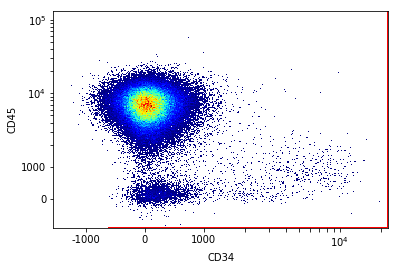

<Figure size 432x288 with 0 Axes>

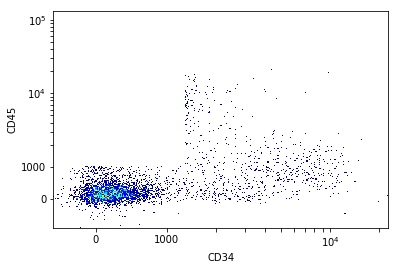

<Figure size 432x288 with 0 Axes>

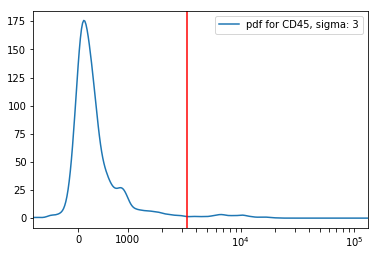

<Figure size 432x288 with 0 Axes>

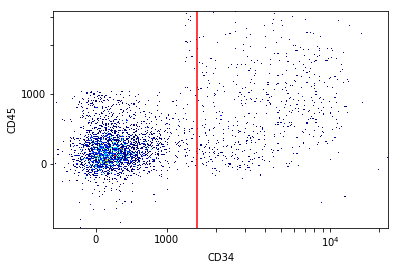

<Figure size 432x288 with 0 Axes>

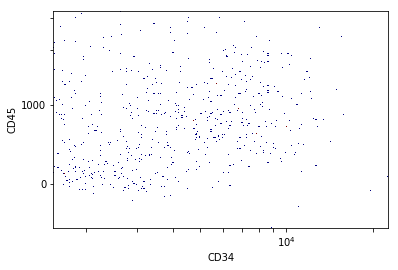

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

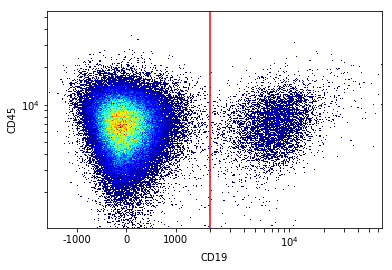

<Figure size 432x288 with 0 Axes>

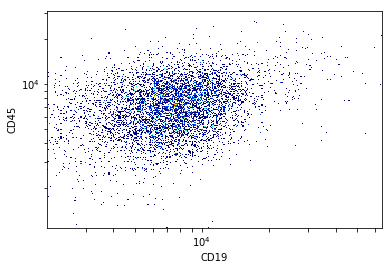

<Figure size 432x288 with 0 Axes>

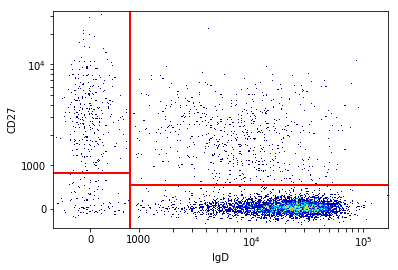

<Figure size 432x288 with 0 Axes>

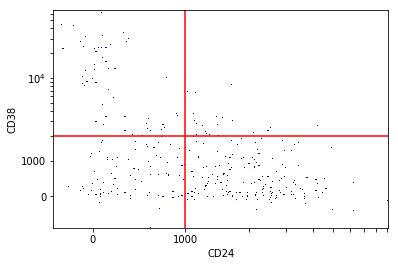

<Figure size 432x288 with 0 Axes>

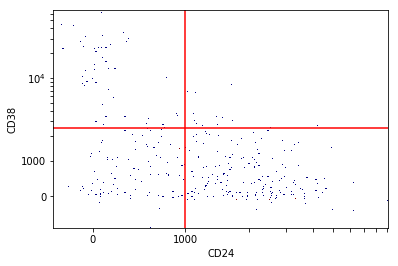

<Figure size 432x288 with 0 Axes>

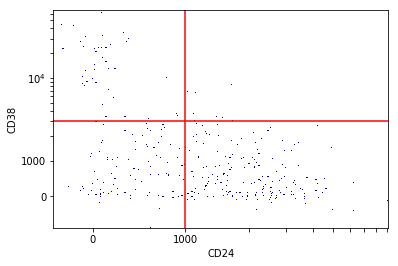

<Figure size 432x288 with 0 Axes>

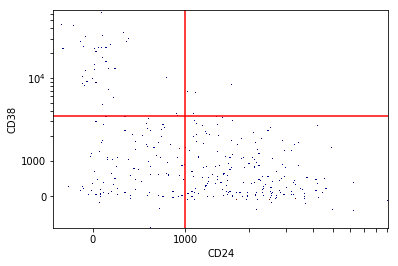

<Figure size 432x288 with 0 Axes>

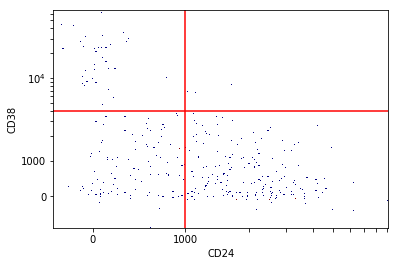

<Figure size 432x288 with 0 Axes>

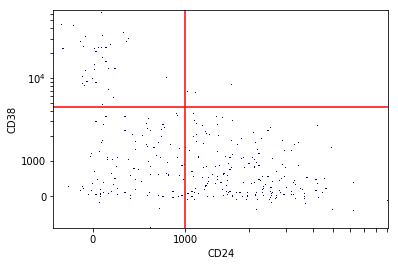

<Figure size 432x288 with 0 Axes>

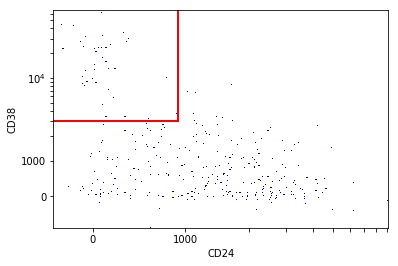

<Figure size 432x288 with 0 Axes>

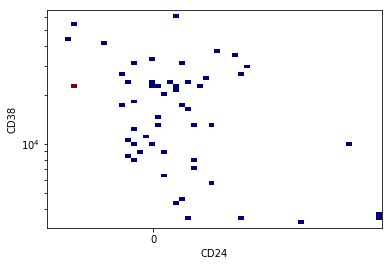

<Figure size 432x288 with 0 Axes>

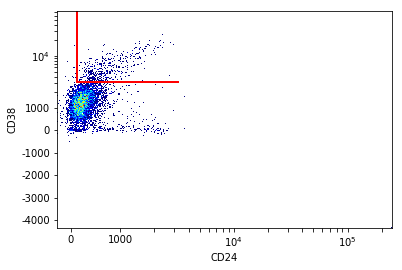

<Figure size 432x288 with 0 Axes>

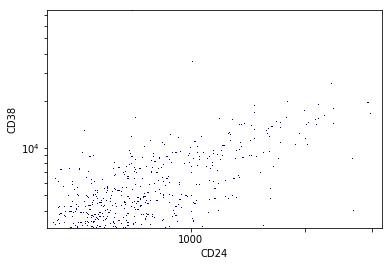

<Figure size 432x288 with 0 Axes>

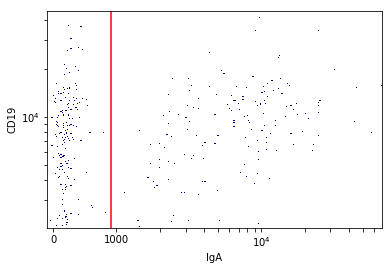

<Figure size 432x288 with 0 Axes>

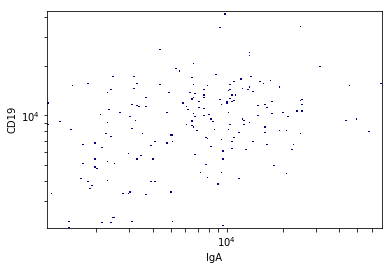

Sample gating done
Complete, no samples had populations with invalid flags


In [6]:
BCell_exp.apply(gateBCellDataSet, folder='BCell')

In [ ]:
BCell_exp.printExperiment("/media/ludvig/Project_Storage/BloodVariome/aligater_output/test_BCell_28-9-2018.txt")